# **Магические методы в Python**

**Магический метод** — это служебный метод, имя которого начинается и заканчивается двойным подчеркиванием.

Магические методы имеют особое значение для *Python*. *Python* автоматически вызывает данные методы в ответ на определенные операции, такие как создание экземпляра, индексация последовательности, управление атрибутами и многое другое. Магические методы поддерживают основные объектно-ориентированные функции в *Python*.

В Python специальные методы также называются магическими методами или методами dunder. Этот последний термин, dunder, относится к определенному соглашению об именовании, которое Python использует для именования своих специальных методов и атрибутов. Соглашение заключается в использовании двойных начальных и конечных подчеркиваний в имени, поэтому оно выглядит так: `.__названиеМетода__()`. Двойные подчеркивания отмечают эти методы как основные для некоторых функций Python. Они помогают избежать конфликтов имен с методами и атрибутами пользователя.

**Примечание:** магические методы получили свое второе название dunder-метод из особенности наименования. Слово «dunder» является сокращением от словосочетания «Double underscore», что переводится как «двойное подчеркивание».

# **Магические методы `__str__` и `__repr__`**

У каждого объекта Python имеется собственное **строковое** и **репрезентативное** представления. Строковое представление - то, как объект отображается в консоли при использовании функций `print()` или `str()`. Репрезентативное представление - то, как объект отображается в консоли (и внутри всяких прочих внутренних Python'овских структур) при его непосредственном вызове (или при использоавнии функции `repr()`).

Для определения строкового представления объекта используется магический метод `__str__`. Данный метод имеется у всех объектов и автоматически вызывается, когда объект передается в качестве аргумента функциям `str()`, `format()` или `print()`. Также его можно вызвыть и явно. Так как `__str__` - метод экземпляра, он должен иметь параметр `self`. Кроме того, он **должен обязательно возвращать строковое значение**, иначе возникнет исключение.

Для опеределения репрезентативного представления объекта в виде строки используется магический метод `__repr__`. Его реализация обычно похожа на реализацию `__str__`, метод также **должен обязательно возвращать строковое значение**.

Если в классе будет реализован только `__repr__`, то строковое представление будет подтягиваться из него. Если не реализованы оба метода, то в обоих случаях используется представление формата `<__main__.Класс object at 0xАдрес>`.

In [ ]:
# пример строкового и репрезентативного представлений объекта
class User:
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name

    def __str__(self):
        return f'Пользователь {self.first_name} {self.last_name}'
    
    def __repr__(self):
        return f'Representative {self.last_name}'


user = User('John', 'Doe')
print(user)  # Пользователь John Doe
print(repr(user)) # Representative Doe

kolya = User('Nikolai', 'Abramov')
print(kolya)  # Пользователь Nikolai Abramov
print(repr(kolya)) # Representative Abramov

# **Магические методы `__len__` и `__abs__`**

**Магический метод `__len__`** определяет, как объект будет вести себя, когда его длина запрашивается с помощью функции `len()`. Для объектов, которые можно измерять или имеют концепцию длины (например, строки, списки, кортежи, множества и т.д.), метод `__len__` позволяет определить их "длину". Под длиной обычно понимается количество элементов коллекции.

Можно не вызывать напрямую функцию `len()`, а сразу обращаться к методу `__len__` по следующему шаблону:

`объект.__len__()`

При создании класса по умолчанию не присутствует поведение, позволяющее находить длину. Следовательно, при попытке передать ЭК в функцию `len` будет возникать ошибка. Реализацию подобного поведения можно осуществить при помощи метода `__len__`.

**Важно:** метод `__len__` должен обязательно возвращать целое положительное число, иначе будет исключение.

**Магический метод __abs__** позволяет получить абсолютное значение объекта (у чисел - модуль), запрошенное при помощи функции `abs()`. Как и в случае с `__len__`, реализация у класса по умолчанию отсутствует.

In [ ]:
# пример использования метода __len__
class User:
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name

    def __len__(self):
        return len(self.first_name + self.last_name)
    

user = User('Valdemar', 'Riss')
print(len(user)) # 12

In [ ]:
# пример использования методов __len__ и __abs__ (для нахождения расстояния между двумя точками отрезка)
class Distance:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2

    def __len__(self): 
        return abs(self) # без встроенной реализации модуля вернёт ошибку в случае, если разница точек отрицательная
    # можно реализовать и проще - сразу abs(self.point1 - self.point2)
    
    def __abs__(self):
        return abs(self.point1 - self.point2)


otrezok = Distance(5, 7)
print(len(otrezok)) # 2

# **Магические методы для математических операций**

Магические методы для основных математических операций: `__add__` (сложение), `__mul__` (умножение), `__sub__` (вычитание), `__truediv__` (деление). Любой класс по умолчанию не имеет реализации методов для математических операций. Логика реализации всех методов совпадает.

Любая математическая операция - *бинарная* операция. Бинарная операция обозначает, что она должна обязательно выполняться над двумя операндами: первый операнд стоит слева от знака операции, второй - справа.

*Python* автоматически вызывает магический метод при математической операции для ЛЕВОГО объекта (A+B = `A.__add__(B)`). Если у левого объекта не реализована такая операция и вызывается исключение, то он пытается применить метод `__radd__` (`__rmul__`, `__rsub__`, `__rtruediv__`) к правому объекту (B+A = `B.__radd__(A)`). Поэтому на случай, если при реализации математических операций ожидается произвольный порядок объектов, нужно реализовывать методы и для обычной, и для "реверсированной" операции.

Помимо основных математических операций, в *Python* существует большое множество прочих. Каждый из них имеет свой "реверсированный" аналог с приставкой "r".

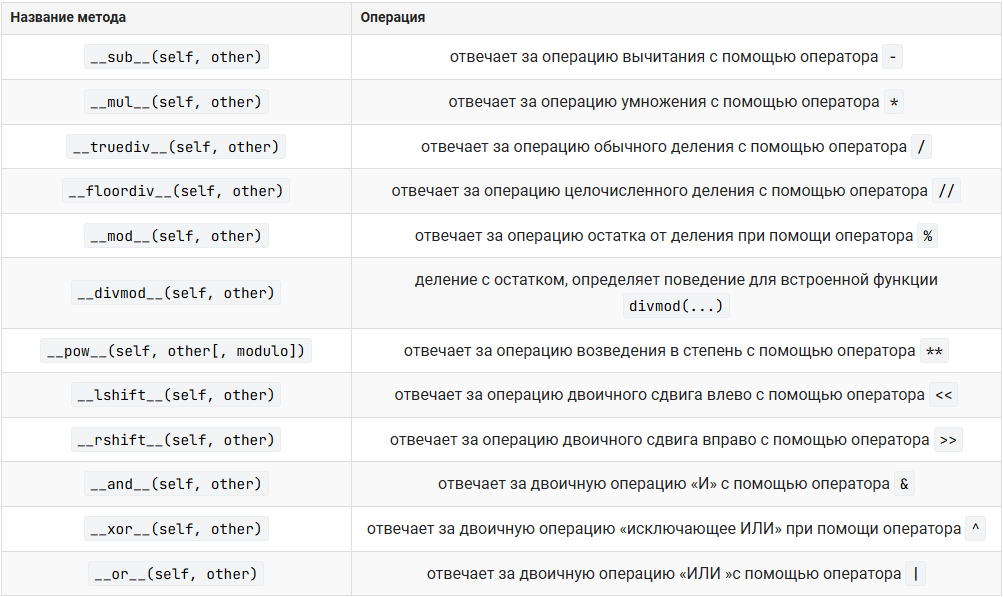

In [ ]:
# пример реализации обычной и "реверсированной" математических операций
class BankAccount:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

    def __add__(self, other):
        if isinstance(other, BankAccount): # сложение балансов двух ЭК
            return self.balance + other.balance
        if isinstance(other, (int, float)): # прибавление числа к имеющемуся ЭК
            return self.balance + other
        raise NotImplemented
    
    def __radd__(self, other): # просто запускает метод __add__ для переданных аргументов
        return self.balance + other
    

ivan = BankAccount('Ivan', 100)
print(ivan + 20) # 120
print(25 + ivan) # 125

# **Магические методы для операций сравнения**

Магические методы для операций сравнения:

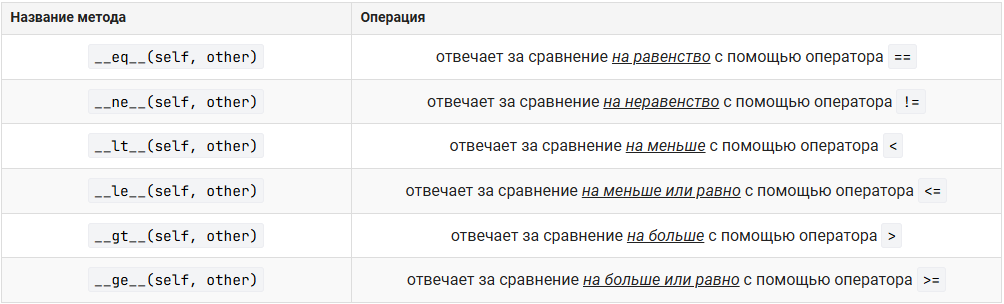

По умолчанию классы не поддерживают операции сравнения, их поведение нужно реализовывать отдельно. Исключение - равенство и неравенство (по умолчанию сравниваются адреса ячеек памяти).

Логика реализации операций сравнения в *Python* схожа с логикой реализации математических операций. Сначала проверяется возможность операции с ЛЕВЫМ операндом, если она отсутствует (`A>B = A.__gt__(B)`), то проверяется возможность "реверсивной" операции с правым операндом (`B<A = B.__lt__(A)`). Поэтому в случае, если предполагается произвольная расстановка операндов при сравнении, нужно реализовывать оба метода.

**Примечание:** если сравниваются два ЭК (а не ЭК и число, к примеру), то не обязательно реализовывать `__ne__`, `__gt__` и `__ge__` (при условии реализации `__eq__`, `__lt__` и `__le__`), т.к. при сравнении в данном случае автоматически запустятся "реверсивные" операции, а реверсивными операциями будут сравнения на равенство, меньше и меньше или равно.

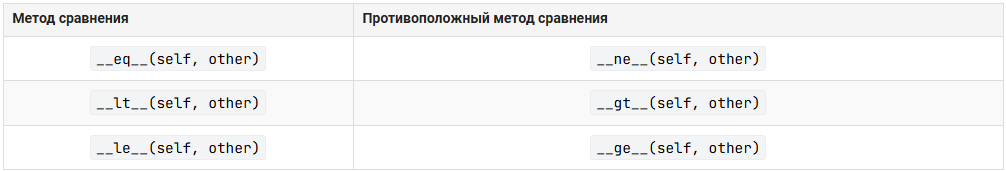

In [ ]:
# пример реализации операций сравнения на примере прямоугольников
class Rectangle:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @property
    def area(self):
        return self.a * self.b

    def __eq__(self, other): # проверка на равенство (равны стороны - равны прямоугольники)
        if isinstance(other, Rectangle):
            return self.a == other.a and self.b == other.b

    def __lt__(self, other): # сравнение площадей
        if isinstance(other, Rectangle):
            return self.area < other.area
        elif isinstance(other, (int, float)):
            return self.area < other

    def __le__(self, other): # сравнение площадей
        return self == other or self < other
    

r = Rectangle(4, 5)
d = Rectangle(2, 4)
w = Rectangle(4, 5)
print(r <= d) # False
print(r >= w) # True
print(r == w) # True
print(r != w) # False
print(r > w) # False
print(r < d) # False
# имея реализацию трёх определённых методов, можно выполнять операции при помощи всех шести операторов

In [ ]:
# использование специфического декоратора позволяет реализовывать все магические методы сравнения при помощи двух - __eq__ и __lt__
from functools import total_ordering

@total_ordering
class Rectangle:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @property
    def area(self):
        return self.a * self.b

    def __eq__(self, other): # проверка на равенство (равны стороны - равны прямоугольники)
        if isinstance(other, Rectangle):
            return self.a == other.a and self.b == other.b

    def __lt__(self, other): # сравнение площадей
        if isinstance(other, Rectangle):
            return self.area < other.area
        elif isinstance(other, (int, float)):
            return self.area < other
        

r = Rectangle(4, 5)
d = Rectangle(2, 4)
w = Rectangle(4, 5)
print(r <= d) # False
print(r >= w) # True
print(r == w) # True
print(r != w) # False
print(r > w) # False
print(r < d) # False

# **Хеш-функция. Магический метод `__hash__`**

**Хеш-функция** (или функция хеширования) - это математическая функция, которая преобразует входные данные (такие как строки, числа, байтовые последовательности) в фиксированный размерный выход, который представляет собой хеш-значение (или хеш-код). Главной целью хеш-функции является преобразование произвольного объема данных в численное значение фиксированной длины.

Хеш-значение может быть использовано для оптимизации операций поиска и сравнения, так как сравнивать числа (хеши) гораздо быстрее, чем сравнивать длинные строки или сложные структуры данных.

В *Python* имеется встроенная функция `hash()`, которая умеет вычислять хэш-значение (или хэш-код) объекта. Хэш-значение представляет собой целочисленное значение, которое вычисляется на основе содержания объекта.

**Особенности вычисления хеш-значения при помощи функции `hash():`**
* Объекты, для которых можно вызвать функцию `hash()`, должны быть неизменяемыми. Это означает, что их значение не может измениться после создания. Строки, числа и кортежи - это примеры неизменяемых объектов. Списки и словари изменяемы и не могут быть хэшированы.
* Если объект не изменяется, то его хэш-значение будет всегда одинаковым в рамках одной сессии выполнения *Python*. Это гарантирует, что объекты с одинаковым содержанием будут иметь одинаковое хэш-значение.
* Важно помнить, что хэш-значение не является уникальным для каждого объекта. Два разных объекта могут иметь одинаковое хэш-значение (коллизию), но если они равны (по сравнению через ==), то их хэш-значения также должны быть равными.

Объекты, которые поддерживают хеширование, могут использоваться в качестве ключей словаря и элементов множества.

В классах по умолчанию реализован метод хеширования (их можно передавать на вход функции `hash()`). Как-то модифицировать процесс хеширования можно при помощи магического метода `__hash__`.

**Важно:** если опререлить метод `__eq__`, то возможность по умолчанию находить хеш у ЭК пропадёт. Для её появления надо вручную реализовать функционал при помощи магического метода `__hash__`.

In [ ]:
# хэширование строк
print(hash("Hello, World!")) # -4053562152839673213

# хэширование чисел
print(hash(42)) # 42

# хэширование кортежа
print(hash((1, 2, 3))) # 529344067295497451

# хеширование ЭК
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __eq__(self, other):
        return isinstance(other, Point) and \
               self.x == other.x and self.y == other.y

    def __hash__(self):
        return hash((self.x, self.y))


p1 = Point(2, 3)

print(hash(p1)) # 8409376899596376432